In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix
import os
import random
import shutil
from shutil import copyfile
from keras.preprocessing.image import ImageDataGenerator
import cv2

In [18]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
values = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']

In [3]:
main_dir='D:\ML_Data/' #ML mini project path
#source and dest dir
# source_dir=main_dir+'Augmented_images/'
dest_dir=main_dir+'signs_resized/'
train_dir=dest_dir+'training/'
val_dir=dest_dir+'validation/'

# for dir1 in values:
#     path=os.path.join(train_dir,dir1)
#     os.mkdir(path)

# for dir1 in values:
#     path=os.path.join(val_dir,dir1)
#     os.mkdir(path)


In [4]:

# Specify the GPU device to use
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  try:
    # Restrict TensorFlow to use only the first GPU
    tf.config.set_visible_devices(gpus[0], 'GPU')
    # Allow memory growth to prevent out-of-memory errors
    tf.config.experimental.set_memory_growth(gpus[0], True)
    print('Configured TensorFlow to use GPU:', gpus[0])
  except RuntimeError as e:
    print(e)
else:
  print('No GPU detected, using CPU instead.')

# Your TensorFlow code here...


Configured TensorFlow to use GPU: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [22]:
# #all directories
# main_dir='/content/drive/MyDrive/ML Mini project/'

# source_dir=main_dir+'Augmented_images/'
# dest_dir=main_dir+'Final_imgs/'


# train_dir=dest_dir+'training/'
# val_dir=dest_dir+'validation/'

# #all letters source dir
# a_source_dir=source_dir+'A/'
# b_source_dir=source_dir+'B/'
# c_source_dir=source_dir+'C/'
# d_source_dir=source_dir+'D/'
# e_source_dir=source_dir+'E/'
# f_source_dir=source_dir+'F/'
# g_source_dir=source_dir+'G/'
# h_source_dir=source_dir+'H/'
# i_source_dir=source_dir+'I/'
# j_source_dir=source_dir+'J/'
# k_source_dir=source_dir+'K/'
# l_source_dir=source_dir+'L/'
# m_source_dir=source_dir+'M/'
# n_source_dir=source_dir+'N/'
# o_source_dir=source_dir+'O/'
# p_source_dir=source_dir+'P/'
# q_source_dir=source_dir+'Q/'
# r_source_dir=source_dir+'R/'
# s_source_dir=source_dir+'S/'
# t_source_dir=source_dir+'T/'
# u_source_dir=source_dir+'U/'
# v_source_dir=source_dir+'V/'
# w_source_dir=source_dir+'W/'
# x_source_dir=source_dir+'X/'
# y_source_dir=source_dir+'Y/'
# z_source_dir=source_dir+'Z/'

# #all letters training dir paths
# a_train_dir=train_dir+'A/'
# b_train_dir=train_dir+'B/'
# c_train_dir=train_dir+'C/'
# d_train_dir=train_dir+'D/'
# e_train_dir=train_dir+'E/'
# f_train_dir=train_dir+'F/'
# g_train_dir=train_dir+'G/'
# h_train_dir=train_dir+'H/'
# i_train_dir=train_dir+'I/'
# j_train_dir=train_dir+'J/'
# k_train_dir=train_dir+'K/'
# l_train_dir=train_dir+'L/'
# m_train_dir=train_dir+'M/'
# n_train_dir=train_dir+'N/'
# o_train_dir=train_dir+'O/'
# p_train_dir=train_dir+'P/'
# q_train_dir=train_dir+'Q/'
# r_train_dir=train_dir+'R/'
# s_train_dir=train_dir+'S/'
# t_train_dir=train_dir+'T/'
# u_train_dir=train_dir+'U/'
# v_train_dir=train_dir+'V/'
# w_train_dir=train_dir+'W/'
# x_train_dir=train_dir+'X/'
# y_train_dir=train_dir+'Y/'
# z_train_dir=train_dir+'Z/'

# #all letters validation dir paths
# a_val_dir=val_dir+'A/'
# b_val_dir=val_dir+'B/'
# c_val_dir=val_dir+'C/'
# d_val_dir=val_dir+'D/'
# e_val_dir=val_dir+'E/'
# f_val_dir=val_dir+'F/'
# g_val_dir=val_dir+'G/'
# h_val_dir=val_dir+'H/'
# i_val_dir=val_dir+'I/'
# j_val_dir=val_dir+'J/'
# k_val_dir=val_dir+'K/'
# l_val_dir=val_dir+'L/'
# m_val_dir=val_dir+'M/'
# n_val_dir=val_dir+'N/'
# o_val_dir=val_dir+'O/'
# p_val_dir=val_dir+'P/'
# q_val_dir=val_dir+'Q/'
# r_val_dir=val_dir+'R/'
# s_val_dir=val_dir+'S/'
# t_val_dir=val_dir+'T/'
# u_val_dir=val_dir+'U/'
# v_val_dir=val_dir+'V/'
# w_val_dir=val_dir+'W/'
# x_val_dir=val_dir+'X/'
# y_val_dir=val_dir+'Y/'
# z_val_dir=val_dir+'Z/'

# #list of all source dir
# ALL_SOURCE=[a_source_dir,
# b_source_dir,
# c_source_dir,
# d_source_dir,
# e_source_dir,
# f_source_dir,
# g_source_dir,
# h_source_dir,
# i_source_dir,
# j_source_dir,
# k_source_dir,
# l_source_dir,
# m_source_dir,
# n_source_dir,
# o_source_dir,
# p_source_dir,
# q_source_dir,
# r_source_dir,
# s_source_dir,
# t_source_dir,
# u_source_dir,
# v_source_dir,
# w_source_dir,
# x_source_dir,
# y_source_dir,
# z_source_dir
# ]

# #list of all train dir
# ALL_TRAIN=[a_train_dir,
# b_train_dir,
# c_train_dir,
# d_train_dir,
# e_train_dir,
# f_train_dir,
# g_train_dir,
# h_train_dir,
# i_train_dir,
# j_train_dir,
# k_train_dir,
# l_train_dir,
# m_train_dir,
# n_train_dir,
# o_train_dir,
# p_train_dir,
# q_train_dir,
# r_train_dir,
# s_train_dir,
# t_train_dir,
# u_train_dir,
# v_train_dir,
# w_train_dir,
# x_train_dir,
# y_train_dir,
# z_train_dir,]

# #list of all val dir
# ALL_VAL=[a_val_dir,
# b_val_dir,
# c_val_dir,
# d_val_dir,
# e_val_dir,
# f_val_dir,
# g_val_dir,
# h_val_dir,
# i_val_dir,
# j_val_dir,
# k_val_dir,
# l_val_dir,
# m_val_dir,
# n_val_dir,
# o_val_dir,
# p_val_dir,
# q_val_dir,
# r_val_dir,
# s_val_dir,
# t_val_dir,
# u_val_dir,
# v_val_dir,
# w_val_dir,
# x_val_dir,
# y_val_dir,
# z_val_dir,]

Train and test split

In [23]:
# #function to split data
# def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):
#   files = []
#   for filename in os.listdir(SOURCE_DIR):
#       file = SOURCE_DIR + filename
#       if os.path.getsize(file) > 0:
#           files.append(filename)
#       else:
#           print(filename + " is zero length, so ignoring.")

#   training_length = int(len(files) * SPLIT_SIZE)
#   testing_length = int(len(files) - training_length)
#   shuffled_set = random.sample(files, len(files))
#   training_set = shuffled_set[0:training_length]
#   testing_set = shuffled_set[-testing_length:]

#   for filename in training_set:
#       this_file = SOURCE_DIR + filename
#       destination = TRAINING_DIR + filename
#       copyfile(this_file, destination)

#   for filename in testing_set:
#       this_file = SOURCE_DIR + filename
#       destination = VALIDATION_DIR + filename
#       copyfile(this_file, destination)


In [24]:
# split_size=0.8
# for i in range(26):
#   split_data(ALL_SOURCE[i],ALL_TRAIN[i],ALL_VAL[i],split_size)

Image Data Generator

In [5]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  train_datagen = ImageDataGenerator(rescale=1/255)
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=256,
                                                      class_mode='categorical',
                                                      target_size=(200,200))
 
  validation_datagen = ImageDataGenerator(rescale=1/255,
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=256,
                                                                class_mode='categorical',
                                                                target_size=(200,200))
  return train_generator, validation_generator

In [6]:
train_generator, validation_generator = train_val_generators(train_dir,val_dir)

Found 9299 images belonging to 26 classes.
Found 3602 images belonging to 26 classes.


Model building

In [7]:
#parameters
img_height=200
img_width=200
num_classes=26
do=0.5
reg=tf.keras.regularizers.l2(l2=0.0015)
batch_size=256
epochs=30

In [23]:
def create_model():
  model = Sequential([
    Conv2D(8, (7,7), activation='relu',input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2,2),
    Conv2D(16, (7,7),  activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(32 ,(7,7),  activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
    ])
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

  return model

In [24]:
model=create_model()

In [25]:
#optimizer = adam; Epochs = 30 ; filter (7,7) ; /2
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 194, 194, 8)       1184      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 97, 97, 8)        0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 91, 91, 16)        6288      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 45, 45, 16)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 39, 39, 32)        25120     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 19, 19, 32)      

In [18]:
#optimizer = adam; Epochs = 30 ; filter (7,7)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 194, 194, 16)      2368      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 97, 97, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 91, 91, 32)        25120     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 39, 39, 64)        100416    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 19, 19, 64)      

In [10]:
#optimizer = adam; Epochs = 50 ; filter (15,15)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 186, 186, 16)      10816     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 93, 93, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 79, 79, 32)        115232    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 39, 39, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 64)        460864    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 64)       0

In [10]:
#optimizer = adam; Epochs = 20 ; filter (11,11)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 190, 190, 16)      5824      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 95, 95, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 85, 85, 32)        61984     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 42, 42, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        247872    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 64)       0

In [15]:
#optimizer = adam; Epochs = 50 ; filter (11,11)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 190, 190, 16)      5824      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 95, 95, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 85, 85, 32)        61984     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 42, 42, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 64)        247872    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 16, 16, 64)      

In [10]:
#optimizer = adam; Epochs = 50
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 186, 186, 16)      10816     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 93, 93, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 79, 79, 32)        115232    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 39, 39, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 64)        460864    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 64)       0

In [12]:
#optimizer = adam; Epochs = 30
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 186, 186, 16)      10816     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 93, 93, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 79, 79, 32)        115232    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 39, 39, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 64)        460864    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 64)       0

In [30]:
#optimizer = rmsprop; Epochs = 30
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 186, 186, 16)      10816     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 93, 93, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 79, 79, 32)        115232    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 39, 39, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 25, 25, 64)        460864    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 12, 12, 64)      

In [26]:
callbacks=keras.callbacks.ModelCheckpoint('./../checkpoints/checkpoint-{epoch}.h5', save_best_only=True)

In [27]:
#optimizer = adam; Epochs = 30 ; filter (7,7) ; /2
history = model.fit(
    train_generator,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=validation_generator,
    verbose=2, #if hvd.rank() == 0 else 0,
    callbacks=callbacks
)

Epoch 1/30
37/37 - 44s - loss: 3.2188 - accuracy: 0.0575 - val_loss: 3.1268 - val_accuracy: 0.0730 - 44s/epoch - 1s/step
Epoch 2/30
37/37 - 41s - loss: 2.9325 - accuracy: 0.1325 - val_loss: 2.9925 - val_accuracy: 0.1438 - 41s/epoch - 1s/step
Epoch 3/30
37/37 - 41s - loss: 2.5950 - accuracy: 0.2260 - val_loss: 2.8009 - val_accuracy: 0.1774 - 41s/epoch - 1s/step
Epoch 4/30
37/37 - 41s - loss: 2.2200 - accuracy: 0.3168 - val_loss: 2.6778 - val_accuracy: 0.2215 - 41s/epoch - 1s/step
Epoch 5/30
37/37 - 41s - loss: 1.8507 - accuracy: 0.4304 - val_loss: 2.6097 - val_accuracy: 0.2665 - 41s/epoch - 1s/step
Epoch 6/30
37/37 - 41s - loss: 1.5776 - accuracy: 0.5032 - val_loss: 2.5974 - val_accuracy: 0.2885 - 41s/epoch - 1s/step
Epoch 7/30
37/37 - 41s - loss: 1.3194 - accuracy: 0.5823 - val_loss: 2.5986 - val_accuracy: 0.3245 - 41s/epoch - 1s/step
Epoch 8/30
37/37 - 42s - loss: 1.0980 - accuracy: 0.6500 - val_loss: 2.5568 - val_accuracy: 0.3462 - 42s/epoch - 1s/step
Epoch 9/30
37/37 - 41s - loss: 0

In [20]:
#optimizer = adam; Epochs = 30 ; filter (7,7)
history = model.fit(
    train_generator,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=validation_generator,
    verbose=2, #if hvd.rank() == 0 else 0,
    callbacks=callbacks
)

Epoch 1/30
37/37 - 46s - loss: 3.2717 - accuracy: 0.0541 - val_loss: 3.2137 - val_accuracy: 0.0797 - 46s/epoch - 1s/step
Epoch 2/30
37/37 - 45s - loss: 2.9382 - accuracy: 0.1381 - val_loss: 3.1553 - val_accuracy: 0.1119 - 45s/epoch - 1s/step
Epoch 3/30
37/37 - 47s - loss: 2.4330 - accuracy: 0.2890 - val_loss: 2.8548 - val_accuracy: 0.1949 - 47s/epoch - 1s/step
Epoch 4/30
37/37 - 47s - loss: 2.0217 - accuracy: 0.3969 - val_loss: 2.9658 - val_accuracy: 0.2279 - 47s/epoch - 1s/step
Epoch 5/30
37/37 - 48s - loss: 1.6065 - accuracy: 0.5119 - val_loss: 2.9805 - val_accuracy: 0.2596 - 48s/epoch - 1s/step
Epoch 6/30
37/37 - 47s - loss: 1.3232 - accuracy: 0.5914 - val_loss: 2.8716 - val_accuracy: 0.2951 - 47s/epoch - 1s/step
Epoch 7/30
37/37 - 47s - loss: 1.0854 - accuracy: 0.6634 - val_loss: 3.2055 - val_accuracy: 0.3037 - 47s/epoch - 1s/step
Epoch 8/30
37/37 - 46s - loss: 0.8573 - accuracy: 0.7365 - val_loss: 3.3711 - val_accuracy: 0.3082 - 46s/epoch - 1s/step
Epoch 9/30
37/37 - 49s - loss: 0

In [12]:
#optimizer = adam; Epochs = 30 ; filter (9,9)
history = model.fit(
    train_generator,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=validation_generator,
    verbose=2, #if hvd.rank() == 0 else 0,
    callbacks=callbacks
)

Epoch 1/30
37/37 - 51s - loss: 3.2581 - accuracy: 0.0515 - val_loss: 3.1760 - val_accuracy: 0.0769 - 51s/epoch - 1s/step
Epoch 2/30
37/37 - 47s - loss: 3.0103 - accuracy: 0.1075 - val_loss: 3.0985 - val_accuracy: 0.0861 - 47s/epoch - 1s/step
Epoch 3/30
37/37 - 47s - loss: 2.6347 - accuracy: 0.2215 - val_loss: 2.8790 - val_accuracy: 0.1863 - 47s/epoch - 1s/step
Epoch 4/30
37/37 - 47s - loss: 2.0355 - accuracy: 0.3839 - val_loss: 2.7233 - val_accuracy: 0.2540 - 47s/epoch - 1s/step
Epoch 5/30
37/37 - 47s - loss: 1.5186 - accuracy: 0.5388 - val_loss: 2.7828 - val_accuracy: 0.3023 - 47s/epoch - 1s/step
Epoch 6/30
37/37 - 48s - loss: 1.0235 - accuracy: 0.6957 - val_loss: 2.8363 - val_accuracy: 0.3537 - 48s/epoch - 1s/step
Epoch 7/30
37/37 - 47s - loss: 0.6801 - accuracy: 0.7913 - val_loss: 3.0173 - val_accuracy: 0.3778 - 47s/epoch - 1s/step
Epoch 8/30
37/37 - 47s - loss: 0.3906 - accuracy: 0.8810 - val_loss: 3.4233 - val_accuracy: 0.3812 - 47s/epoch - 1s/step
Epoch 9/30
37/37 - 47s - loss: 0

In [12]:
#optimizer = adam; Epochs = 50 ; filter (15,15)
history = model.fit(
    train_generator,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=validation_generator,
    verbose=2, #if hvd.rank() == 0 else 0,
    callbacks=callbacks
)

Epoch 1/50
37/37 - 77s - loss: 3.3564 - accuracy: 0.0432 - val_loss: 3.2561 - val_accuracy: 0.0430 - 77s/epoch - 2s/step
Epoch 2/50
37/37 - 74s - loss: 3.2385 - accuracy: 0.0465 - val_loss: 3.2533 - val_accuracy: 0.0494 - 74s/epoch - 2s/step
Epoch 3/50
37/37 - 74s - loss: 3.2102 - accuracy: 0.0553 - val_loss: 3.2396 - val_accuracy: 0.0522 - 74s/epoch - 2s/step
Epoch 4/50
37/37 - 74s - loss: 3.1515 - accuracy: 0.0638 - val_loss: 3.2262 - val_accuracy: 0.0639 - 74s/epoch - 2s/step
Epoch 5/50
37/37 - 75s - loss: 3.0792 - accuracy: 0.0953 - val_loss: 3.2217 - val_accuracy: 0.0763 - 75s/epoch - 2s/step
Epoch 6/50
37/37 - 75s - loss: 2.9873 - accuracy: 0.1136 - val_loss: 3.2078 - val_accuracy: 0.0869 - 75s/epoch - 2s/step
Epoch 7/50
37/37 - 75s - loss: 2.8906 - accuracy: 0.1359 - val_loss: 3.1624 - val_accuracy: 0.0999 - 75s/epoch - 2s/step
Epoch 8/50
37/37 - 75s - loss: 2.8186 - accuracy: 0.1563 - val_loss: 3.1034 - val_accuracy: 0.1199 - 75s/epoch - 2s/step
Epoch 9/50
37/37 - 75s - loss: 2

In [12]:
#optimizer = adam; Epochs = 20 ; filter (11,11)
history = model.fit(
    train_generator,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=validation_generator,
    verbose=2, #if hvd.rank() == 0 else 0,
    callbacks=callbacks
)

Epoch 1/20
37/37 - 59s - loss: 3.2504 - accuracy: 0.0429 - val_loss: 3.1679 - val_accuracy: 0.0630 - 59s/epoch - 2s/step
Epoch 2/20
37/37 - 56s - loss: 2.9733 - accuracy: 0.1098 - val_loss: 3.1104 - val_accuracy: 0.1036 - 56s/epoch - 2s/step
Epoch 3/20
37/37 - 57s - loss: 2.7506 - accuracy: 0.1846 - val_loss: 2.9540 - val_accuracy: 0.1688 - 57s/epoch - 2s/step
Epoch 4/20
37/37 - 57s - loss: 2.4682 - accuracy: 0.2608 - val_loss: 2.8371 - val_accuracy: 0.1810 - 57s/epoch - 2s/step
Epoch 5/20
37/37 - 56s - loss: 2.1208 - accuracy: 0.3473 - val_loss: 2.6923 - val_accuracy: 0.2482 - 56s/epoch - 2s/step
Epoch 6/20
37/37 - 57s - loss: 1.8107 - accuracy: 0.4333 - val_loss: 2.6612 - val_accuracy: 0.2685 - 57s/epoch - 2s/step
Epoch 7/20
37/37 - 57s - loss: 1.4940 - accuracy: 0.5317 - val_loss: 2.6389 - val_accuracy: 0.3259 - 57s/epoch - 2s/step
Epoch 8/20
37/37 - 57s - loss: 1.1980 - accuracy: 0.6220 - val_loss: 2.7341 - val_accuracy: 0.3329 - 57s/epoch - 2s/step
Epoch 9/20
37/37 - 57s - loss: 0

KeyboardInterrupt: 

In [17]:
#optimizer = adam; Epochs = 50 ; filter (11,11)
history = model.fit(
    train_generator,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=validation_generator,
    verbose=2, #if hvd.rank() == 0 else 0,
    callbacks=callbacks
)

Epoch 1/50
37/37 - 64s - loss: 3.2269 - accuracy: 0.0473 - val_loss: 3.1792 - val_accuracy: 0.0522 - 64s/epoch - 2s/step
Epoch 2/50
37/37 - 64s - loss: 2.9730 - accuracy: 0.1235 - val_loss: 3.1508 - val_accuracy: 0.1138 - 64s/epoch - 2s/step
Epoch 3/50
37/37 - 61s - loss: 2.7266 - accuracy: 0.1993 - val_loss: 2.9798 - val_accuracy: 0.1682 - 61s/epoch - 2s/step
Epoch 4/50
37/37 - 58s - loss: 2.2849 - accuracy: 0.3157 - val_loss: 2.8202 - val_accuracy: 0.2304 - 58s/epoch - 2s/step
Epoch 5/50
37/37 - 58s - loss: 1.8905 - accuracy: 0.4229 - val_loss: 2.5858 - val_accuracy: 0.2965 - 58s/epoch - 2s/step
Epoch 6/50
37/37 - 58s - loss: 1.6376 - accuracy: 0.4958 - val_loss: 2.6883 - val_accuracy: 0.2998 - 58s/epoch - 2s/step
Epoch 7/50
37/37 - 58s - loss: 1.2222 - accuracy: 0.6200 - val_loss: 2.5673 - val_accuracy: 0.3554 - 58s/epoch - 2s/step
Epoch 8/50
37/37 - 58s - loss: 0.9612 - accuracy: 0.6975 - val_loss: 2.7360 - val_accuracy: 0.3659 - 58s/epoch - 2s/step
Epoch 9/50
37/37 - 58s - loss: 0

In [12]:
#optimizer = adam; Epochs = 50
history = model.fit(
    train_generator,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=validation_generator,
    verbose=2, #if hvd.rank() == 0 else 0,
    callbacks=callbacks
)

Epoch 1/50
37/37 - 96s - loss: 3.3906 - accuracy: 0.0444 - val_loss: 3.2651 - val_accuracy: 0.0483 - 96s/epoch - 3s/step
Epoch 2/50
37/37 - 74s - loss: 3.2368 - accuracy: 0.0494 - val_loss: 3.2430 - val_accuracy: 0.0478 - 74s/epoch - 2s/step
Epoch 3/50
37/37 - 74s - loss: 3.1816 - accuracy: 0.0702 - val_loss: 3.1829 - val_accuracy: 0.0702 - 74s/epoch - 2s/step
Epoch 4/50
37/37 - 74s - loss: 3.0166 - accuracy: 0.1109 - val_loss: 3.1085 - val_accuracy: 0.1144 - 74s/epoch - 2s/step
Epoch 5/50
37/37 - 76s - loss: 2.7598 - accuracy: 0.1741 - val_loss: 3.0814 - val_accuracy: 0.1483 - 76s/epoch - 2s/step
Epoch 6/50
37/37 - 76s - loss: 2.4863 - accuracy: 0.2457 - val_loss: 3.0052 - val_accuracy: 0.1535 - 76s/epoch - 2s/step
Epoch 7/50
37/37 - 75s - loss: 2.2359 - accuracy: 0.3140 - val_loss: 2.9178 - val_accuracy: 0.1982 - 75s/epoch - 2s/step
Epoch 8/50
37/37 - 75s - loss: 2.0025 - accuracy: 0.3828 - val_loss: 2.8570 - val_accuracy: 0.2351 - 75s/epoch - 2s/step
Epoch 9/50
37/37 - 75s - loss: 1

In [14]:
#optimizer = adam; Epochs = 30
history = model.fit(
    train_generator,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=validation_generator,
    verbose=2, #if hvd.rank() == 0 else 0,
    callbacks=callbacks
)

Epoch 1/30
25/25 - 76s - loss: 3.3367 - accuracy: 0.0396 - val_loss: 3.2673 - val_accuracy: 0.0397 - 76s/epoch - 3s/step
Epoch 2/30
25/25 - 72s - loss: 3.2448 - accuracy: 0.0400 - val_loss: 3.2624 - val_accuracy: 0.0391 - 72s/epoch - 3s/step
Epoch 3/30
25/25 - 71s - loss: 3.2427 - accuracy: 0.0408 - val_loss: 3.2696 - val_accuracy: 0.0397 - 71s/epoch - 3s/step
Epoch 4/30
25/25 - 72s - loss: 3.2426 - accuracy: 0.0382 - val_loss: 3.2634 - val_accuracy: 0.0403 - 72s/epoch - 3s/step
Epoch 5/30
25/25 - 72s - loss: 3.2420 - accuracy: 0.0397 - val_loss: 3.2668 - val_accuracy: 0.0397 - 72s/epoch - 3s/step
Epoch 6/30
25/25 - 71s - loss: 3.2415 - accuracy: 0.0394 - val_loss: 3.2608 - val_accuracy: 0.0394 - 71s/epoch - 3s/step
Epoch 7/30
25/25 - 72s - loss: 3.2420 - accuracy: 0.0382 - val_loss: 3.2657 - val_accuracy: 0.0414 - 72s/epoch - 3s/step
Epoch 8/30
25/25 - 71s - loss: 3.2416 - accuracy: 0.0393 - val_loss: 3.2664 - val_accuracy: 0.0414 - 71s/epoch - 3s/step
Epoch 9/30
25/25 - 72s - loss: 3

In [32]:
#optimizer = rmsprop; Epochs = 30
history = model.fit(
    train_generator,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=validation_generator,
    verbose=2, #if hvd.rank() == 0 else 0,
    callbacks=callbacks
)

Epoch 1/30
25/25 - 77s - loss: 4.5575 - accuracy: 0.0398 - val_loss: 3.2553 - val_accuracy: 0.0397 - 77s/epoch - 3s/step
Epoch 2/30
25/25 - 75s - loss: 3.2707 - accuracy: 0.0406 - val_loss: 3.2564 - val_accuracy: 0.0419 - 75s/epoch - 3s/step
Epoch 3/30
25/25 - 74s - loss: 3.2389 - accuracy: 0.0489 - val_loss: 3.2790 - val_accuracy: 0.0414 - 74s/epoch - 3s/step
Epoch 4/30
25/25 - 75s - loss: 3.2961 - accuracy: 0.0445 - val_loss: 3.2545 - val_accuracy: 0.0519 - 75s/epoch - 3s/step
Epoch 5/30
25/25 - 75s - loss: 3.2850 - accuracy: 0.0593 - val_loss: 3.2626 - val_accuracy: 0.0539 - 75s/epoch - 3s/step
Epoch 6/30
25/25 - 74s - loss: 3.1868 - accuracy: 0.0758 - val_loss: 3.2514 - val_accuracy: 0.0516 - 74s/epoch - 3s/step
Epoch 7/30
25/25 - 75s - loss: 4.0722 - accuracy: 0.0779 - val_loss: 3.2323 - val_accuracy: 0.0730 - 75s/epoch - 3s/step
Epoch 8/30
25/25 - 74s - loss: 3.1620 - accuracy: 0.0829 - val_loss: 3.4616 - val_accuracy: 0.0608 - 74s/epoch - 3s/step
Epoch 9/30
25/25 - 74s - loss: 3

In [29]:
model.save('adam_30_7_div_2.h5')

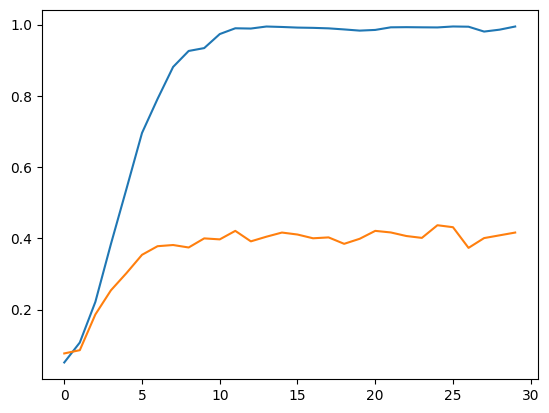

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

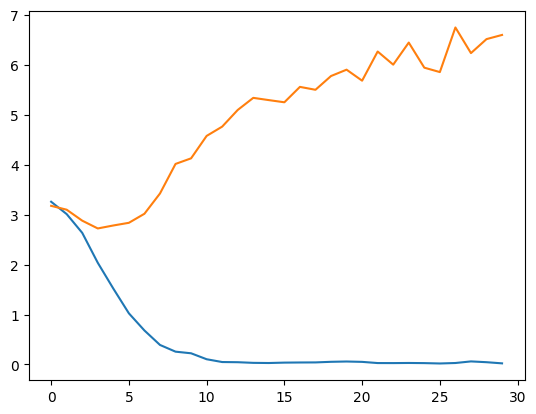

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])